In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner

/Users/cl5968/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# plotting style (optional!)
import matplotlib as mpl
from matplotlib import rc
mpl.style.use('classic')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mlmodern}'

mpl.rc('xtick', labelsize=27) 
mpl.rc('ytick', labelsize=27)
mpl.rc('xtick', labelsize=27) 
mpl.rc('ytick', labelsize=27)

mpl.rcParams['xtick.major.size'] = 10.0
mpl.rcParams['xtick.major.width'] = 1.75
mpl.rcParams['ytick.major.size'] = 10.0
mpl.rcParams['ytick.major.width'] = 1.75

mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['patch.linewidth'] = 2.0
mpl.rcParams['xtick.major.pad'] = 10.0
mpl.rcParams['ytick.major.pad'] = 10.0

mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

mpl.rcParams['xtick.minor.size'] = 5.0
mpl.rcParams['xtick.minor.width'] = 1.75
mpl.rcParams['ytick.minor.size'] = 5.0
mpl.rcParams['ytick.minor.width'] = 1.75

mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True

import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

# Make corner-style plot

In [3]:
# load DR4 exoplanet catalog
DR4_df = pd.read_csv('DR4_mock_exoplanet_catalog.csv', encoding='utf-8')
DR4_df

Gaia source IDs  True distance [pc]  True RA [deg]  True Dec [deg]  \
0     5862916884898276864             159.835     190.564268      -63.578927   
1     1317376390783150080              90.239     244.451871       27.793075   
2     6718019348545856512              28.924     287.787845      -38.717515   
3     4855934177121615744             191.835      58.027016      -37.663374   
4     4909108694040252928             141.810      21.036511      -59.052307   
...                   ...                 ...            ...             ...   
7540  4221443919824574976              70.914     299.317909       -4.468372   
7541  4633205698662519680              99.446      26.459796      -78.719895   
7542  2416205668513950080             112.548       2.611860      -16.617056   
7543  5870728369607743360             353.655     206.259155      -59.521653   
7544   311334315202544256              75.611      15.262510       28.996767   

      Stellar mass [M_\odot]  G-band mag  True planet mass [M_J]  \
0                      0.807      12.367                   9.808   
1                      0.580      13.403                   3.701   
2                      0.488      11.106                   8.175   
3                      1.174       9.702                   9.216   
4                      0.503      14.423                   8.550   
...                      ...         ...                     ...   
7540                   0.393      13.913                   2.446   
7541                   0.628      13.371                   8.370   
7542                   0.329      15.553                   7.489   
7543                   1.227      11.291                   7.633   
7544                   1.028       8.463                   4.845   

      True period [days]  True inclination [deg]  True eccentricity  ...  \
0               1191.884                 141.621              0.023  ...   
1               2540.754                  50.376              0.090  ...   
2                598.870                  45.217              0.455  ...   
3               1275.843                  15.991              0.091  ...   
4                760.997                  23.396              0.072  ...   
...                  ...                     ...                ...  ...   
7540            1424.500                  46.637              0.421  ...   
7541             566.955                 124.612              0.075  ...   
7542             861.929                  65.229              0.100  ...   
7543            1134.013                  33.965              0.016  ...   
7544            1491.653                 134.717              0.062  ...   

      MCMC period 84th [days]  MCMC planet mass 16th [M_J]  \
0                    1232.368                        9.119   
1                    4861.999                        8.409   
2                     602.278                        7.807   
3                    1347.237                       10.527   
4                     765.411                        8.651   
...                       ...                          ...   
7540                 1466.261                        3.096   
7541                  573.224                        8.239   
7542                  922.406                        7.876   
7543                 1277.767                       12.763   
7544                 1635.009                        4.401   

      MCMC planet mass 50th [M_J]  MCMC planet mass 84th [M_J]  \
0                           9.818                       10.632   
1                          15.600                       24.411   
2                           8.129                        8.490   
3                          12.251                       14.942   
4                           9.471                       10.562   
...                           ...                          ...   
7540                        5.309                       15.376   
7541                        8.972             

In [4]:
# quantities in catalog
DR4_df.keys()

Index(['Gaia source IDs', 'True distance [pc]', 'True RA [deg]',
       'True Dec [deg]', 'Stellar mass [M_\odot]', 'G-band mag',
       'True planet mass [M_J]', 'True period [days]',
       'True inclination [deg]', 'True eccentricity', 'True omega [deg]',
       'True Omega [deg]', 'True T_peri [days]', 'Best-fit planet mass [M_J]',
       'Best-fit period [days]', 'Best-fit inclination [deg]',
       'Best-fit eccentricity', 'Best-fit omega [deg]', 'Best-fit Omega [deg]',
       'Best-fit T_peri [days]', 'MCMC distance 16th [pc]',
       'MCMC distance 50th [pc]', 'MCMC distance 84th [pc]',
       'MCMC period 16th [days]', 'MCMC period 50th [days]',
       'MCMC period 84th [days]', 'MCMC planet mass 16th [M_J]',
       'MCMC planet mass 50th [M_J]', 'MCMC planet mass 84th [M_J]',
       'MCMC eccentricity 16th', 'MCMC eccentricity 50th',
       'MCMC eccentricity 84th', 'MCMC inclination 16th [deg]',
       'MCMC inclination 50th [deg]', 'MCMC inclination 84th [deg]'],
      dtyp

In [5]:
# collect properties
DR4_true_dists = np.array(DR4_df['True distance [pc]'])
DR4_stellar_masses = np.array(DR4_df['Stellar mass [M_\odot]'])
DR4_G_mags = np.array(DR4_df['G-band mag'])
DR4_bestfit_planet_masses = np.array(DR4_df['Best-fit planet mass [M_J]'])
DR4_bestfit_periods = np.array(DR4_df['Best-fit period [days]'])/365.25 # convert to years
DR4_bestfit_incs = np.array(DR4_df['Best-fit inclination [deg]'])
DR4_bestfit_eccs = np.array(DR4_df['Best-fit eccentricity'])
DR4_bestfit_semi_as = ((DR4_bestfit_periods)**(2/3))*((DR4_stellar_masses + DR4_bestfit_planet_masses/1047.57)**(1/3))

In [6]:
# load DR4 exoplanet catalog
DR5_df = pd.read_csv('DR5_mock_exoplanet_catalog.csv', encoding='utf-8')
DR5_df

Gaia source IDs  True distance [pc]  True RA [deg]  \
0       1914881589484335744             242.027     346.723264   
1         33660762506050688             124.050      42.005258   
2       5980784879311008640             384.556     239.857998   
3       4448049589813812864             217.991     255.514229   
4        513485472209024640             287.760      35.063695   
...                     ...                 ...            ...   
117300   571472822101916928             281.610      67.094840   
117301  5373315940586172672             669.468     170.555140   
117302   647009030409573248             211.648     148.748183   
117303  6089807809438826752             424.887     211.416711   
117304  5862475160432567296             584.102     198.651284   

        True Dec [deg]  Stellar mass [M_\odot]  G-band mag  \
0            35.231956                   0.773      12.987   
1            16.067598                   0.961       9.894   
2           -54.198063                   0.759      14.951   
3            11.896010                   0.742      13.214   
4            60.956039                   0.764      13.777   
...                ...                     ...         ...   
117300       84.802709                   0.726      14.045   
117301      -48.757228                   1.193      12.700   
117302       27.112450                   0.328      16.931   
117303      -51.088260                   1.204      11.937   
117304      -62.745669                   0.904      14.212   

        True planet mass [M_J]  True period [days]  True inclination [deg]  \
0                        5.487            2095.254                  40.356   
1                        3.102            1591.664                  59.503   
2                        6.589            3254.088                 157.010   
3                       11.701            3347.988                 124.287   
4                        9.320             719.829                 109.818   
...                        ...                 ...                     ...   
117300                   6.762            2730.361                  38.410   
117301                  11.706            2129.112                  36.280   
117302                   4.822            2599.355                  53.649   
117303                   9.897            3381.957                  82.457   
117304                  10.118            1979.716                  31.596   

        True eccentricity  ...  MCMC period 84th [days]  \
0                   0.170  ...                 2212.359   
1                   0.345  ...                 1679.253   
2                   0.188  ...                 3647.850   
3                   0.245  ...                 3508.997   
4                   0.079  ...                  730.938   
...                   ...  ...                      ...   
117300              0.196  ...                 2718.569   
117301              0.049  ...                 2210.482   
117302              0.043  ...                 2854.006   
117303              0.551  ...                 3862.164   
117304              0.381  ...                 1951.268   

        MCMC planet mass 16th [M_J]  MCMC planet mass 50th [M_J]  \
0                             5.489                        5.994   
1                             2.620                        3.314   
2                             8.733                       12.552   
3                            11.431                       11.863   
4                             9.742                       11.329   
...                             ...                          ...   
117300                        6.942                        7.563   
117301                       12.092                       13.935   
117302                        9.899                       24.410   
117303                       13.041                       27.445   
117304                       10.335                       12.174   

        MCM

In [7]:
# quantities in catalog
DR5_df.keys()

Index(['Gaia source IDs', 'True distance [pc]', 'True RA [deg]',
       'True Dec [deg]', 'Stellar mass [M_\odot]', 'G-band mag',
       'True planet mass [M_J]', 'True period [days]',
       'True inclination [deg]', 'True eccentricity', 'True omega [deg]',
       'True Omega [deg]', 'True T_peri [days]', 'Best-fit planet mass [M_J]',
       'Best-fit period [days]', 'Best-fit inclination [deg]',
       'Best-fit eccentricity', 'Best-fit omega [deg]', 'Best-fit Omega [deg]',
       'Best-fit T_peri [days]', 'MCMC distance 16th [pc]',
       'MCMC distance 50th [pc]', 'MCMC distance 84th [pc]',
       'MCMC period 16th [days]', 'MCMC period 50th [days]',
       'MCMC period 84th [days]', 'MCMC planet mass 16th [M_J]',
       'MCMC planet mass 50th [M_J]', 'MCMC planet mass 84th [M_J]',
       'MCMC eccentricity 16th', 'MCMC eccentricity 50th',
       'MCMC eccentricity 84th', 'MCMC inclination 16th [deg]',
       'MCMC inclination 50th [deg]', 'MCMC inclination 84th [deg]'],
      dtyp

In [8]:
# collect properties
DR5_true_dists = np.array(DR5_df['True distance [pc]'])
DR5_stellar_masses = np.array(DR5_df['Stellar mass [M_\odot]'])
DR5_G_mags = np.array(DR5_df['G-band mag'])
DR5_bestfit_planet_masses = np.array(DR5_df['Best-fit planet mass [M_J]'])
DR5_bestfit_periods = np.array(DR5_df['Best-fit period [days]'])/365.25 # convert to years
DR5_bestfit_incs = np.array(DR5_df['Best-fit inclination [deg]'])
DR5_bestfit_eccs = np.array(DR5_df['Best-fit eccentricity'])
DR5_bestfit_semi_as = ((DR5_bestfit_periods)**(2/3))*((DR5_stellar_masses + DR5_bestfit_planet_masses/1047.57)**(1/3))

In [9]:
# create 'chain' objects for plotting with corner
DR4_corner_chain = np.array([DR4_true_dists, DR4_stellar_masses, DR4_G_mags, DR4_bestfit_planet_masses, DR4_bestfit_semi_as, DR4_bestfit_periods, DR4_bestfit_incs, DR4_bestfit_eccs]).T
DR5_corner_chain = np.array([DR5_true_dists, DR5_stellar_masses, DR5_G_mags, DR5_bestfit_planet_masses, DR5_bestfit_semi_as, DR5_bestfit_periods, DR5_bestfit_incs, DR5_bestfit_eccs]).T
labels = [r"$r~[\mathrm{pc}]$", r"$M_\star~[M_\odot]$", r"$G$", r"$m_p~[M_\mathrm{J}]$", r"$a~[\mathrm{AU}]$",
          r"$P_\mathrm{orb}~[\mathrm{yr}]$", r"$i~[\mathrm{deg}]$", r"$e$",]

In [10]:
# make plot
fig = plt.figure(figsize=(14*1.6,14*1.6), facecolor='white', dpi=600)

corner.corner(DR5_corner_chain, labels=labels, fig=fig, label_kwargs = {"fontsize": 30}, labelpad=0.02,
              range=[(0.0, 700.0), (0.1, 1.6), (7.0, 19.0), (0.0, 13.0), (0.0, 7.0), (0.0, 14.0), (0.0, 180.0), (0.0, 0.9)],
              #levels = [0.864],
              #levels = [0.118, 0.393, 0.675, 0.864],
              levels = [0.393, 0.864],
              contour_kwargs={"linewidths": 3.0},
              plot_datapoints=False, plot_density=True, bins=20, smooth=0.9,
              hist_kwargs={"linewidth": 2.25})

corner.corner(DR4_corner_chain, labels=labels, fig=fig, color='indianred', label_kwargs = {"fontsize": 30}, labelpad=0.02,
              range=[(0.0, 700.0), (0.1, 1.6), (7.0, 19.0), (0.0, 13.0), (0.0, 7.0), (0.0, 14.0), (0.0, 180.0), (0.0, 0.9)],
              #levels = [0.864],
              #levels = [0.118, 0.393, 0.675, 0.864],
              levels = [0.393, 0.864],
              contour_kwargs={"linewidths": 3.0},
              plot_datapoints=False, plot_density=True, bins=20, smooth=0.9,
              hist_kwargs={"visible": False})

# add DR4 distributions (renormalize to compare density with DR5)
axes = np.array(fig.axes).reshape((8, 8))
axes[0, 0].hist(DR4_true_dists, range=(0.0, 700.0), bins=20, weights=np.ones_like(DR4_true_dists)*len(DR5_true_dists)/len(DR4_true_dists), color='indianred', histtype='step', lw=2.25, zorder=10, label='$\mathrm{DR4}$')
axes[0, 0].hist(10, range=(0.0, 1.0), bins=20, color='k', histtype='step', lw=2.25, zorder=10, label='$\mathrm{DR5}$')
axes[0, 0].set_ylim([0, 2.6e4])
axes[0, 0].legend(loc='upper right', handletextpad=0.4, bbox_to_anchor=(1.07, 1.01), frameon=False, fontsize=22)
axes[1, 1].hist(DR4_stellar_masses, range=(0.1, 1.6), bins=20, weights=np.ones_like(DR4_stellar_masses)*len(DR5_stellar_masses)/len(DR4_stellar_masses), color='indianred', histtype='step', lw=2.25, zorder=10)
axes[1, 1].set_ylim([0, 1.85e4])
axes[2, 2].hist(DR4_G_mags, range=(7.0, 19.0), bins=20, weights=np.ones_like(DR4_G_mags)*len(DR5_G_mags)/len(DR4_G_mags), color='indianred', histtype='step', lw=2.25, zorder=10)
axes[2, 2].set_ylim([0, 1.85e4])
axes[3, 3].hist(DR4_bestfit_planet_masses, range=(0.0, 13.0), bins=20, weights=np.ones_like(DR4_bestfit_planet_masses)*len(DR5_bestfit_planet_masses)/len(DR4_bestfit_planet_masses), color='indianred', histtype='step', lw=2.25, zorder=10)
axes[3, 3].set_ylim([0, 1.31e4])
axes[4, 4].hist(DR4_bestfit_semi_as, range=(0.0, 7.0), bins=20, weights=np.ones_like(DR4_bestfit_semi_as)*len(DR5_bestfit_semi_as)/len(DR4_bestfit_semi_as), color='indianred', histtype='step', lw=2.25, zorder=10)
axes[4, 4].set_ylim([0, 3.6e4])
axes[5, 5].hist(DR4_bestfit_periods, range=(0.0, 14.0), bins=20, weights=np.ones_like(DR4_bestfit_periods)*len(DR5_bestfit_periods)/len(DR4_bestfit_periods), color='indianred', histtype='step', lw=2.25, zorder=10)
axes[5, 5].set_ylim([0, 3.7e4])
axes[6, 6].hist(DR4_bestfit_incs, range=(0.0, 180.0), bins=20, weights=np.ones_like(DR4_bestfit_incs)*len(DR5_bestfit_incs)/len(DR4_bestfit_incs), color='indianred', histtype='step', lw=2.25, zorder=10)
axes[6, 6].set_ylim([0, 1.05e4])
axes[7, 7].hist(DR4_bestfit_eccs, range=(0.0, 0.9), bins=20, weights=np.ones_like(DR4_bestfit_eccs)*len(DR5_bestfit_eccs)/len(DR4_bestfit_eccs), color='indianred', histtype='step', lw=2.25, zorder=10)
axes[7, 7].set_ylim([0, 1.33e4])
plt.show()

# Make plot illustrating dependence on detection criteria

In [11]:
# load DR4 master list
DR4_master_df = pd.read_csv('DR4_master_orbital_fits.csv', encoding='utf-8')
DR4_planet_masses = np.array(DR4_master_df['Best-fit planet mass [M_J]'])
DR4_Porb_84ths = np.array(DR4_master_df['MCMC period 84th [days]'])
DR4_Porb_16ths = np.array(DR4_master_df['MCMC period 16th [days]'])
DR4_Delta_chi2s = np.array(DR4_master_df['\Delta \chi^2'])

# default detection criteria
DR4_mask1 = (DR4_planet_masses < 13.0)
DR4_mask2 = (DR4_Delta_chi2s > 50.0)
DR4_mask3 = (DR4_Porb_84ths/DR4_Porb_16ths < 1.5)
len(DR4_Porb_84ths), len(DR4_Porb_16ths), len(DR4_Delta_chi2s)

(29129, 29129, 29129)

In [12]:
# load DR5 master list
DR5_master_df = pd.read_csv('DR5_master_orbital_fits.csv', encoding='utf-8')
DR5_planet_masses = np.array(DR5_master_df['Best-fit planet mass [M_J]'])
DR5_Porb_84ths = np.array(DR5_master_df['MCMC period 84th [days]'])
DR5_Porb_16ths = np.array(DR5_master_df['MCMC period 16th [days]'])
DR5_Delta_chi2s = np.array(DR5_master_df['\Delta \chi^2'])

# default detection criteria
DR5_mask1 = (DR5_planet_masses < 13.0)
DR5_mask2 = (DR5_Delta_chi2s > 50.0)
DR5_mask3 = (DR5_Porb_84ths/DR5_Porb_16ths < 1.5)
len(DR5_Porb_84ths), len(DR5_Porb_16ths), len(DR5_Delta_chi2s)

(269318, 269318, 269318)

In [13]:
# calculate how the number of detections depends on the Delta chi2 threshold
delta_chi2_vals = np.logspace(np.log10(50.0), np.log10(5e5), 50)
num_detections_DR4 = np.zeros(len(delta_chi2_vals))
num_detections_DR5 = np.zeros(len(delta_chi2_vals))
for i in range(len(delta_chi2_vals)):
    num_detections_DR4[i] = np.sum((DR4_mask1 & DR4_mask3) & (delta_chi2_vals[i] < DR4_Delta_chi2s))
    num_detections_DR5[i] = np.sum((DR5_mask1 & DR5_mask3) & (delta_chi2_vals[i] < DR5_Delta_chi2s))

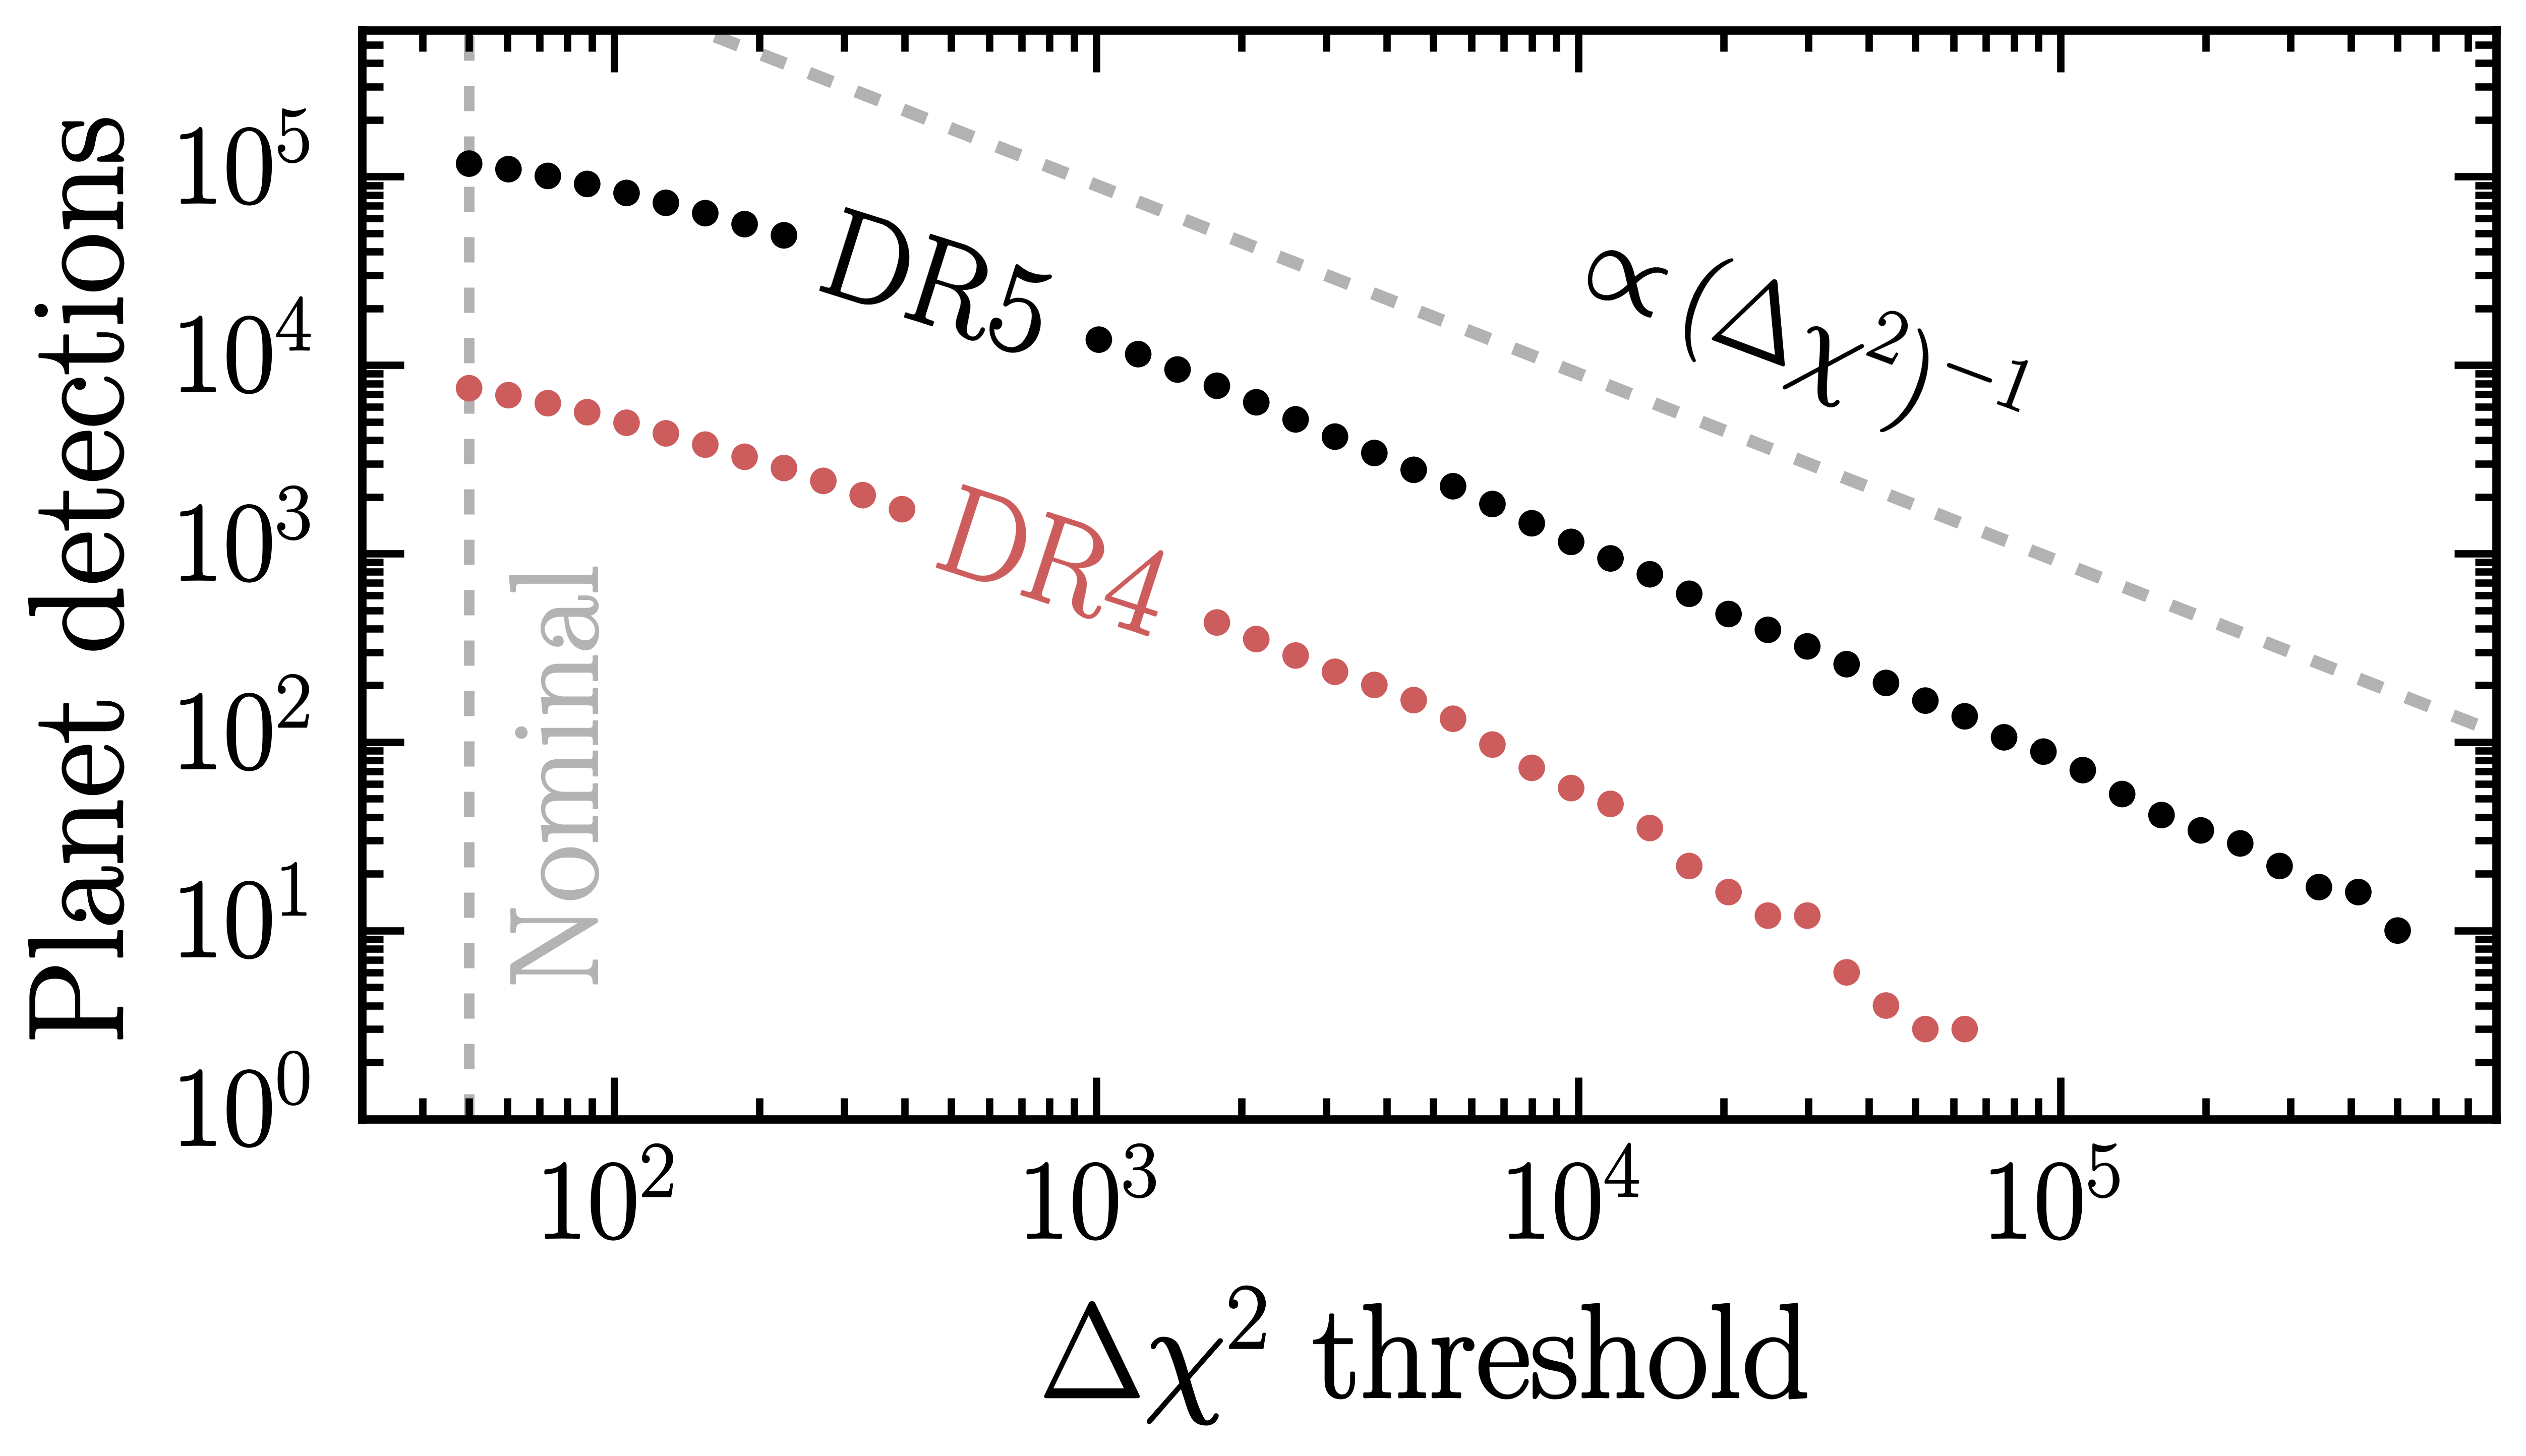

In [14]:
# make plot
fig = plt.figure(figsize=(9.1, 4.5), dpi=600, facecolor='white')
plt.axvline(x=50, c='k', alpha=0.3, lw=2.5, ls='--', zorder=-10)
plt.plot(np.linspace(10, 1e6, 1000), 9.0e7/np.linspace(10, 1e6, 1000), c='k', ls='--', lw=3, alpha=0.3)
plt.scatter(delta_chi2_vals, num_detections_DR5, c='k', edgecolor='none', s=40, label=r'$\mathrm{DR5}$')
plt.scatter(delta_chi2_vals[:39], num_detections_DR4[:39], c='indianred', edgecolor='none', s=40, label=r'$\mathrm{DR4}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\Delta \chi^2~\mathrm{threshold}$', labelpad=7, fontsize=32)
plt.ylabel(r'$\mathrm{Planet~detections}$', labelpad=7, fontsize=32)
plt.xlim([30, 8e5])
plt.ylim([1, 6e5])

# add label for scaling law
plt.text(3e4, 1.3e4, r'${\propto}\,(\Delta \chi^2)^{-1}$', rotation=-20.5, horizontalalignment='center', verticalalignment='center', fontsize=26)
plt.text(80, 70, r'$\mathrm{Nominal}$', rotation=90, c='k', alpha=0.3, horizontalalignment='center', verticalalignment='center', fontsize=30)


# add DR5 and DR4 labels
plt.annotate(r'$\mathrm{DR5}$', xy=(470, 2.3e4),
                xytext=(0, 0), textcoords='offset points',
                ha='center', va='center',
                fontsize=30,
                color='black',
                bbox=dict(boxstyle="round,pad=0.23", fc="white", ec="none", alpha=1.0),
                zorder=10,
               rotation=-17.5)
plt.annotate(r'$\mathrm{DR4}$', xy=(820, 0.77e3),
                xytext=(0, 0), textcoords='offset points',
                ha='center', va='center',
                fontsize=30,
                color='indianred',
                bbox=dict(boxstyle="round,pad=0.23", fc="white", ec="none", alpha=1.0),
                zorder=10,
               rotation=-18.0)
plt.show()

In [15]:
# calculate how the number of detections depends on the threshold on Porb84th/Porb16th
rel_Porb_precision = np.logspace(np.log10(1.0), np.log10(1e-3), 50)
num_detections_DR4 = np.zeros(len(delta_chi2_vals))
num_detections_DR5 = np.zeros(len(delta_chi2_vals))
for i in range(len(delta_chi2_vals)):
    num_detections_DR4[i] = np.sum((DR4_mask1 & DR4_mask2) & (DR4_Porb_84ths/DR4_Porb_16ths - 1.0 < rel_Porb_precision[i]))
    num_detections_DR5[i] = np.sum((DR5_mask1 & DR5_mask2) & (DR5_Porb_84ths/DR5_Porb_16ths - 1.0 < rel_Porb_precision[i]))

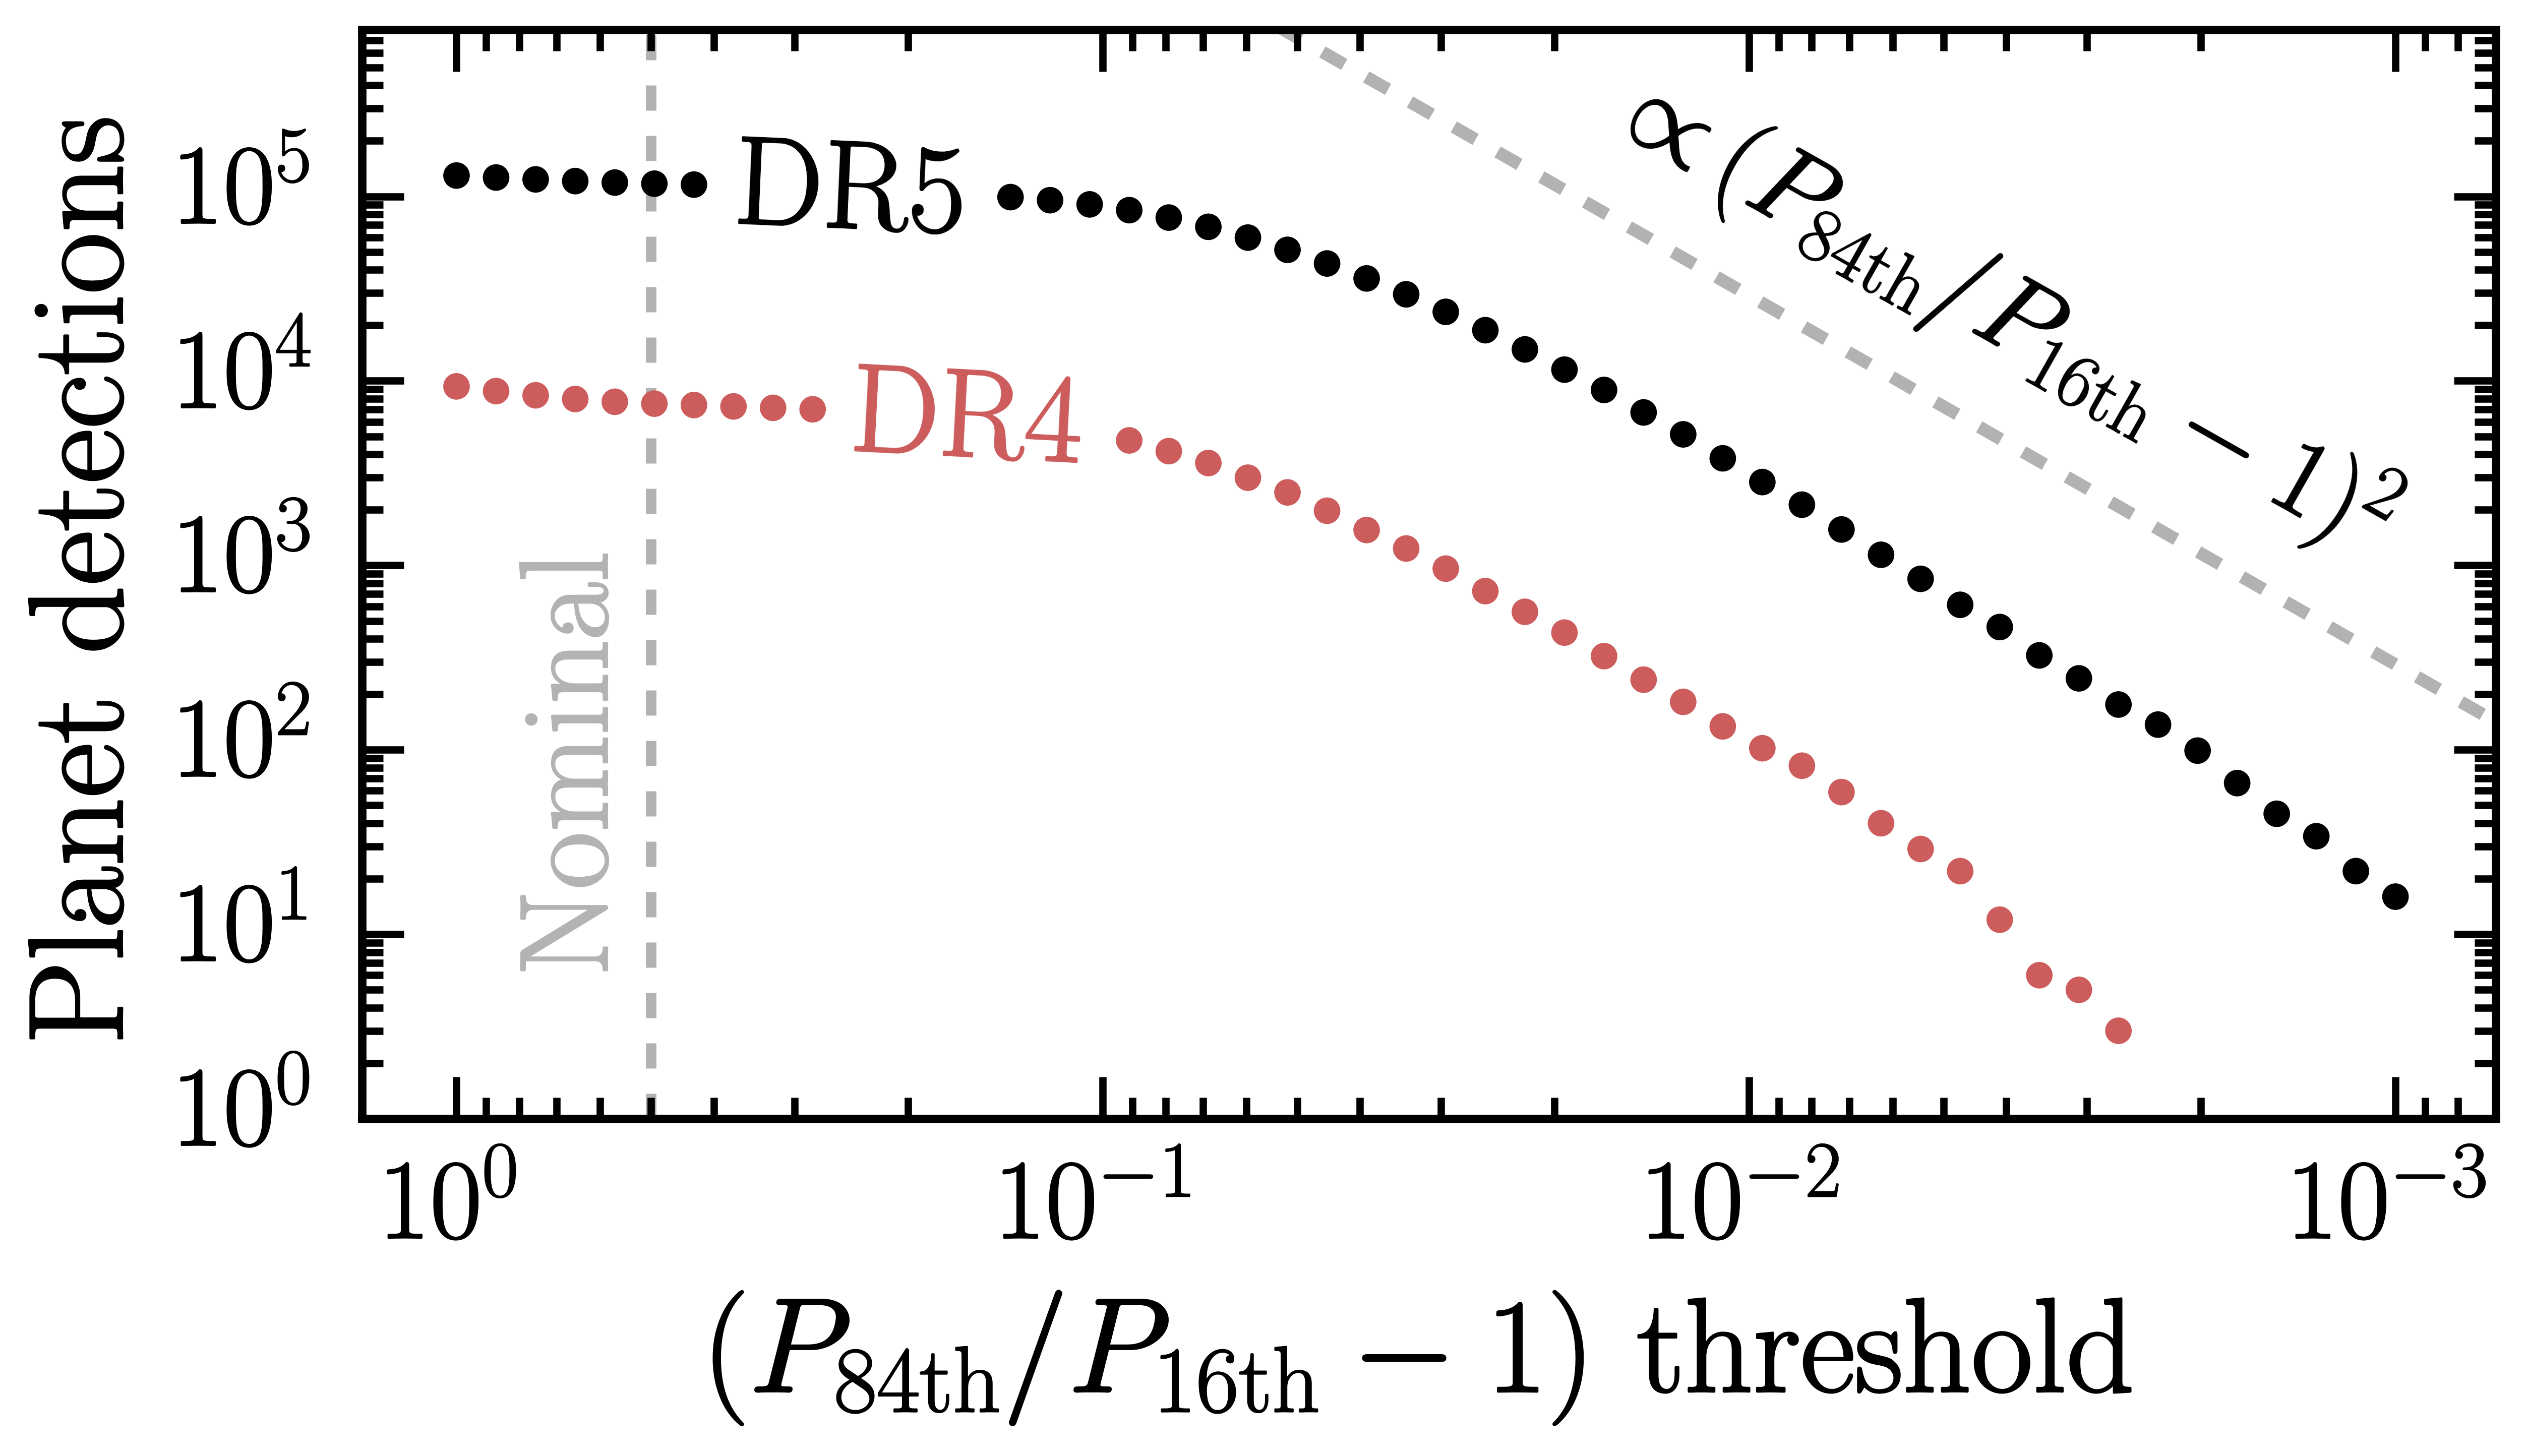

In [16]:
# make plot
logbins = np.logspace(np.log10(50.0), np.log10(1e5), 25)
fig = plt.figure(figsize=(9.1, 4.5), dpi=600, facecolor='white')
plt.axvline(x=0.5, c='k', alpha=0.3, lw=2.5, ls='--', zorder=-10)
plt.plot(np.logspace(-4.0, 0.0, 1000), 2.9e8*(np.logspace(-4.0, 0.0, 1000)**2), c='k', ls='--', lw=3, alpha=0.3)
plt.scatter(rel_Porb_precision, num_detections_DR5, c='k', edgecolor='none', s=40, label=r'$\mathrm{DR5}$')
plt.scatter(rel_Porb_precision[:43], num_detections_DR4[:43], c='indianred', edgecolor='none', s=40, label=r'$\mathrm{DR4}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$(P_\mathrm{84th}/P_\mathrm{16th} - 1)~\mathrm{threshold}$', labelpad=7, fontsize=32)
plt.ylabel(r'$\mathrm{Planet~detections}$', labelpad=7, fontsize=32)
plt.xlim([1.4, 0.7e-3])
plt.ylim([1, 8e5])

# add label for scaling law
plt.text(3.9e-3, 0.21e5, r'${\propto}\,(P_\mathrm{84th}/P_\mathrm{16th} - 1)^{2}$', rotation=-29.5, horizontalalignment='center', verticalalignment='center', fontsize=26)
plt.text(0.65, 0.9e2, r'$\mathrm{Nominal}$', rotation=90, c='k', alpha=0.3, horizontalalignment='center', verticalalignment='center', fontsize=30)

# add DR5 and DR4 labels
plt.annotate(r'$\mathrm{DR5}$', xy=(0.242, 0.97e5),
                xytext=(0, 0), textcoords='offset points',
                ha='center', va='center',
                fontsize=30,
                color='black',
                bbox=dict(boxstyle="round,pad=0.19", fc="white", ec="none", alpha=1.0),
                zorder=10,
               rotation=-2.5)
plt.annotate(r'$\mathrm{DR4}$', xy=(0.16, 5.6e3),
                xytext=(0, 0), textcoords='offset points',
                ha='center', va='center',
                fontsize=30,
                color='indianred',
                bbox=dict(boxstyle="round,pad=0.21", fc="white", ec="none", alpha=1.0),
                zorder=10,
               rotation=-3.0)

plt.show()